**Importing Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.datasets import fetch_california_housing


**Loading Dataset**

In [2]:
# Load the California Housing Dataset
california = fetch_california_housing()

# Create DataFrame
df = pd.DataFrame(california.data, columns=california.feature_names)

# Add the target variable (house values) to the DataFrame
df['Price'] = california.target

# Show the first few rows of the dataset
print(df.head())

# Check for missing values and data types
print(df.info())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup   

**Define Features**

In [3]:
X = df.drop('Price', axis=1)  # Features (excluding target variable)
y = df['Price']  # Target variable (house prices)

# Train-Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Check Multicollinearity and Fit Linear Model**

In [4]:
# Check Multicollinearity (VIF - Variance Inflation Factor)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("Variance Inflation Factor (VIF):\n")
print(vif_data)

# Fit Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Model Coefficients and Intercept
print("\nCoefficients:\n", model.coef_)
print("\nIntercept:\n", model.intercept_)

# Predictions on the test set
y_pred = model.predict(X_test)



Variance Inflation Factor (VIF):

      Feature         VIF
0      MedInc   11.511140
1    HouseAge    7.195917
2    AveRooms   45.993601
3   AveBedrms   43.590314
4  Population    2.935745
5    AveOccup    1.095243
6    Latitude  559.874071
7   Longitude  633.711654

Coefficients:
 [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]

Intercept:
 -37.02327770606416


**Model Evaluation**

In [5]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")



Mean Squared Error (MSE): 0.5558915986952444
Mean Absolute Error (MAE): 0.5332001304956554
R-squared (R2): 0.5757877060324508


**Plotting Actual vs Predicted Values**

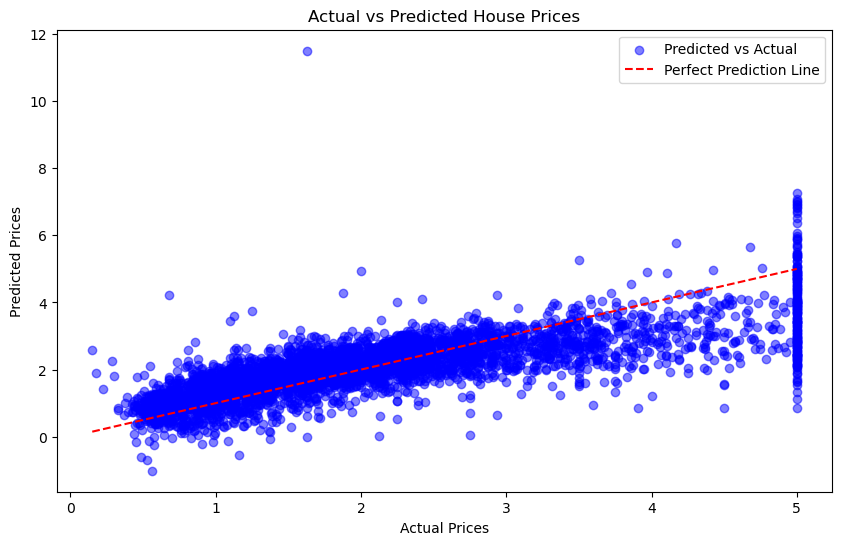

In [6]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual', alpha=0.5)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.legend()

plt.show()


**Assumptions Checking**

1. Residuals

In [7]:
residuals = y_test - y_pred


1.1. Linearity Check (Residuals vs Fitted Values)

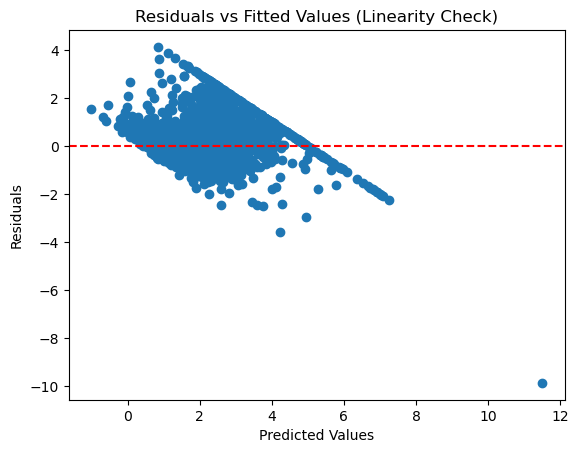

In [8]:
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values (Linearity Check)')
plt.show()



1.2. Homoscedasticity Check (Abs Residuals vs Fitted Values)

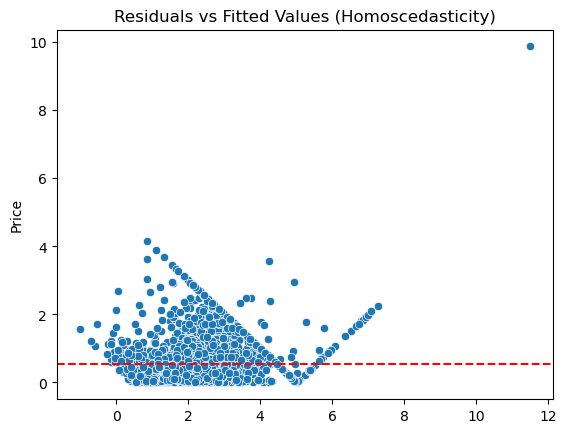

In [9]:
sns.scatterplot(x=y_pred, y=np.abs(residuals))
plt.axhline(np.mean(np.abs(residuals)), color='red', linestyle='--')
plt.title("Residuals vs Fitted Values (Homoscedasticity)")
plt.show()



1.3. Normality of Residuals (Q-Q plot)

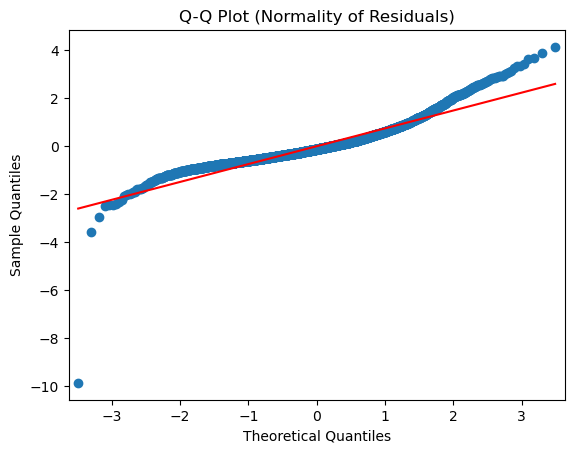

In [10]:
sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot (Normality of Residuals)")
plt.show()



1.4. Durbin-Watson Test for Autocorrelation

In [11]:
dw = sm.stats.durbin_watson(residuals)
print(f"Durbin-Watson Statistic: {dw}")



Durbin-Watson Statistic: 2.040741738727076


1.5. Outliers Detection using Cook's Distance

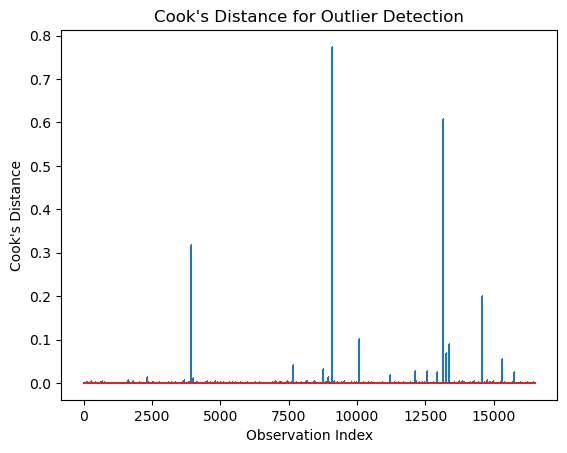

In [12]:
influence = sm.OLS(y_train, sm.add_constant(X_train)).fit().get_influence()
(c, _) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.title("Cook's Distance for Outlier Detection")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.show()


**Final Prediction for House Prices**

In [13]:
final_predictions = model.predict(X)
df['Predicted_Price'] = final_predictions


**Display selected columns from the dataframe**

In [14]:
print(df[['AveRooms', 'AveOccup', 'MedInc', 'HouseAge', 'Price', 'Predicted_Price']].head())



   AveRooms  AveOccup  MedInc  HouseAge  Price  Predicted_Price
0  6.984127  2.555556  8.3252      41.0  4.526         4.151943
1  6.238137  2.109842  8.3014      21.0  3.585         3.999520
2  8.288136  2.802260  7.2574      52.0  3.521         3.673580
3  5.817352  2.547945  5.6431      52.0  3.413         3.258795
4  6.281853  2.181467  3.8462      52.0  3.422         2.402847


**Save the predictions to a CSV file**

In [15]:
df.to_csv('predicted_house_prices.csv', index=False)
